<a href="https://colab.research.google.com/github/leenago/Projects/blob/master/KDX/MBN_%EB%89%B4%EC%8A%A4%EB%8D%B0%EC%9D%B4%ED%84%B0__%ED%98%84%EA%B2%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/Shared drives/청년취업아카데미_KDX한국데이터거래소/Data/MBN 뉴스 데이터

/content/gdrive/Shared drives/청년취업아카데미_KDX한국데이터거래소/Data/MBN 뉴스 데이터


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bs

In [ ]:
pd.options.mode.chained_assignment = None

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.2MB/s 
     |████████████████████████████████| 3.8MB 58.8MB/s 
     |████████████████████████████████| 92kB 10.5MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


#### 구글 드라이브 마운트

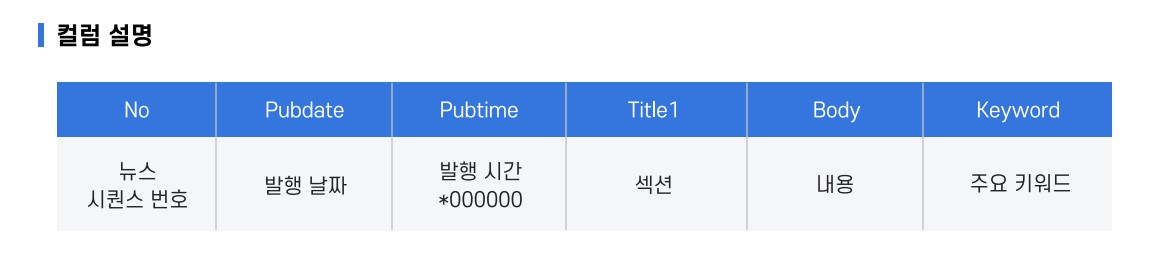

In [ ]:
mk_news = pd.read_excel('mk_news_201901_202006.xlsx')
mk_news

,no,pubdate,pubtime,title1,body,keywords
0,2304119,20200312,0.0,사회일반,NaN,NaN
1,3937779,20190112,0.0,출판/도서,<!--[[--image0--]]//--> ◆ 야바위 게임 / 마이클 슈월비 지음...,"신간,소개"
2,3953320,20190101,0.0,테마기획,◆ 2019 경제기상도 / 부동산 ◆ \n <!--[[--image0--]]//--...,"ㅈ,ㅈ"
3,3953321,20190101,0.0,테마기획,◆ 2019 경제기상도 / 금리 ◆ \n <!--[[--image0--]]//-->...,"금리,경제기상도"
4,3953324,20190101,0.0,테마기획,<!--[[--image0--]]//--> '황금돼지해'인 2019년 기해년(己亥...,"경제,성장,경제기상도"
...,...,...,...,...,...,...
316819,4541564,20200630,225757.0,방송/TV,<!--[[--image0--]]//--> \n[ 매일경제 스타투데이 서지경 객원...,NaN
316820,4541571,20200630,230932.0,방송/TV,<!--[[--image0--]]//--> \n[ 매일경제 스타투데이 서지경 객원...,NaN
316821,4541579,20200630,231823.0,방송/TV,<!--[[--image0--]]//--> [매일경제 스타투데이 허은경 객원기자]...,NaN
316822,4541586,20200630,232907.0,방송/TV,<!--[[--image0--]]//--> \n[ 매일경제 스타투데이 서지경 객원...,NaN


In [ ]:
mk = mk_news.copy()

mk.columns

Index(['no', 'pubdate', 'pubtime', 'title1', 'body', 'keywords'], dtype='object')

In [ ]:
#내용 중복 제거
new_mk = mk.drop_duplicates(['title1','body'], keep='first', ignore_index = True)
len(new_mk)

297623

In [ ]:
#title1에 있는 카테고리는 총 174개
new_mk['title1'].unique()

array(['사회일반', '출판/도서', '테마기획', '의약/건강', '중견/중소기업', '증권계동향', '노동/노사',
       '경제일반', '문화산업', '공연/전시/음악', '신문/방송', '바둑', '기자24시', '매경칼럼', '사외칼럼',
       '인물/인터뷰', '인사', '사설', '아파트/분양', '신도시/토지', '유통·섬유·음식료', '외환·환율',
       '금융정책·일반', '카드·캐피털', '과학기술/특허', '사고/알림', '경기/지표', '정치일반', '해외증시',
       '채권/펀드', '국제금융', '국제경제', '국제산업', '국제정치', '항공·해운', '자동차', '기업 경영',
       '축구', '골프', '레저/관광', '기업정보', '남북관계', '외교·국방', '시세/시황', '법원·검찰·경찰',
       '교통/환경/날씨', '카툰', '핫이슈', '방송/TV', '가요', '사건·사고', '기타', '야구',
       '컴퓨터/정보통신', '무역/통상', nan, '세금', '국제사회', '전기·전자·통신', '국제사건/사고',
       'Economy', '헬스저널', '기업일반·재계동향', '교육', '건설업계 동향', '보건/복지', 'Seoul',
       '스포츠(기타)', '중공업·기계·금속', '지역경제', '부음', '행정·지자체', '취업/채용', '공시',
       '은행', '상가/오피스텔', '보험', '시황', '칼럼', '창업', 'Asia', 'Market',
       'CONSUMER JOURNAL', '저축은행·기타', '포토', 'Biz', '세제/정책', '화학·에너지',
       'Cover Story', 'Review&Observation', 'Photos', '벤쳐/벤쳐캐피탈',
       '재개발/재건축', '증권정책', '당좌거래 정지', '영화', 'THE BIZ TIMES',
       'Money & Rich

In [ ]:
new_mk.isnull().sum()

no               0
pubdate          0
pubtime          1
title1        9541
body             2
keywords    141268
dtype: int64

### 데이터 정제

In [ ]:
#body의 1번째에 해당하는 값을 300자까지 출력
example = new_mk['body'][1][:300]
type(example)

str

In [ ]:
import re
example1 = re.sub('[^ㄱ-힣A-Z]',' ',example )
example1

'                           야바위 게임   마이클 슈월비 지음   노정태 옮김    만    원  도덕의 문제로 불평등의 심각함을 말할 수 있다고 주장하는 책  슈월비는 불평등 구조를 유지하며 도덕과 부의 문제를 일으키는  있는 자 들의  가지 기본 법칙을 소개한다  문예출판사 펴냄    직장인의 바른 습관   문성후 지음    만    원 주   시간 근무제라는 새로운 업무 환경에 직면한 직장인들의 일과 삶에 꼭 필요한 습관을 담은 직장 생활 지침서다  이지퍼블리싱 펴냄    마취의 시대   로랑 드 쉬테르 '

In [ ]:
#모든 body에 대해 정규화 진행
news_sub = []

for i in range(len(new_mk)):
  news_sub.append(re.sub('[^ㄱ-힣A-Z]',' ', str(new_mk['body'][i])))

new_mk['정규화'] = news_sub

In [ ]:
new_mk['정규화'][10]

'       경제기상도                              올해 유통업계 키워드는 온라인이다  백화점과 대형마트 등 성장을 주도해왔던 오프라인 업체들이 부진해 소매시장 성장률은 크게 둔화될 것으로 보인다  이경희 이마트 유통산업연구소 팀장은  소매구조가 온라인과 소형 포맷 중심으로 빠르게 재편돼 올해 소매시장 성장률 둔화가 예상된다 며      년 소매시장은      성장한 반면  올해에는      성장이 전망된다 고 밝혔다  오프라인 매장 대신 온라인으로 구매하는 온라인 쇼핑이 대세로 자리 잡으면서 온라인 선점 경쟁에는 불이 붙는다   지난해 소셜커머스 쿠팡이 소프트뱅크에서  조원의 추가 투자를 유치하고  오픈마켓   번가가 국민연금 등에서     억원의 자금을 끌어오면서 시작된 투자 경쟁이 올해 실전에서 본격화된다  투자를 등에 업은 업체들이 공격적인 마케팅을 펼치고  물류 창고 등을 신설해 배송 서비스를 혁신하면 온라인 쇼핑 경쟁이 더 치열해질 전망이다  롯데쇼핑은  조원 투자를 예고했고  신세계는  조원을 투자받아 오는  월 이커머스 신설 법인을 출범한다  정연승 단국대 경영학부 교수에 따르면     년 기준으로 이미  커머스 시장 매출액   조    억원 이 대형마트 매출액   조    억원 에 육박한다  정 교수는  인공지능 등 첨단기술을 집약한 플랫폼을 기반으로 검색 결제 배송을 하나의 플랫폼에서 해결하는 커머스    시대로 접어들 것 으로 내다봤다   오프라인 매장 중에서는 편의점 등 집에서 가까워 손쉽게 들르는  스몰 포맷  매장이 경쟁력을 유지할 가능성이 높다  대한상공회의소가 발간한      유통산업 통계집에 따르면     년 기준 편의점        다음으로 무점포 소매       의 판매액 증가율이 높았고 슈퍼마켓      과 백화점         대형마트      는 부진했다  다만 최저임금 인상 여파로 편의점 출점 속도는 작년에 이미 크게 둔화됐다  최저임금 인상분이 상품 가격에 반영되면 물가 상승폭도 다소 커질 수

## 한가지만 실습 - Business_strategy

In [ ]:
Business_strategy = new_mk[new_mk.title1=='Business Strategy']
Business_strategy.reset_index(inplace=True)
Business_strategy

,index,no,pubdate,pubtime,title1,body,keywords,정규화
0,3287,3961020,20190107,161524.0,Business Strategy,사티아 나델라(51) 최고경영자(CEO)가 마이크로소프트로 취임한지 5년 만에 이...,NaN,사티아 나델라 최고경영자 CEO 가 마이크로소프트로 취임한지 년 만에 이...
1,3327,3961106,20190107,164646.0,Business Strategy,"12월 1일, 대한민국이 ‘미래’를 쏘아 올렸다. SK텔레콤·KT·LG유플러스 이...",NaN,월 일 대한민국이 미래 를 쏘아 올렸다 SK텔레콤 KT LG유플러스 이...
2,3845,3962005,20190108,140808.0,Business Strategy,한국 조선업은 2018년 연간 수주 실적에서 중국을 제치고 세계 1위를 달성한 것...,NaN,한국 조선업은 년 연간 수주 실적에서 중국을 제치고 세계 위를 달성한 것...
3,4036,3962331,20190108,171552.0,Business Strategy,주 52시간 근로제의 본격적 의무 시행이 눈앞으로 다가왔다. 물론 주 52시간 근...,NaN,주 시간 근로제의 본격적 의무 시행이 눈앞으로 다가왔다 물론 주 시간 근...
4,18829,3991071,20190208,142605.0,Business Strategy,TV는 언제나 집안의 중심을 차지해왔다. 기술 발전으로 잠시 관심에서 멀어진 듯한...,NaN,TV는 언제나 집안의 중심을 차지해왔다 기술 발전으로 잠시 관심에서 멀어진 듯한...
...,...,...,...,...,...,...,...,...
99,278475,4505509,20200529,144352.0,Business Strategy,코로나19 장기화로 ‘비대면 사회’가 가속화하는 가운데 온라인 쇼핑이 ‘포스트 코로...,NaN,코로나 장기화로 비대면 사회 가 가속화하는 가운데 온라인 쇼핑이 포스트 코로...
100,278537,4505614,20200529,154334.0,Business Strategy,‘동영상 시대’가 왔다. 미취학 아동부터 7080 노인까지 저마다 즐겨 찾는 영상 ...,NaN,동영상 시대 가 왔다 미취학 아동부터 노인까지 저마다 즐겨 찾는 영상 ...
101,278559,4505656,20200529,161124.0,Business Strategy,유통업계의 온라인화가 가속화하면서 오프라인 매장은 단순히 제품을 판매하는 것 이상의...,NaN,유통업계의 온라인화가 가속화하면서 오프라인 매장은 단순히 제품을 판매하는 것 이상의...
102,282478,4513059,20200605,103855.0,Business Strategy,"▶“심장박동처럼 울리는 배기음, 날카로운 코너링의\n박진감, 드라이빙의 짜릿함과 스...",NaN,심장박동처럼 울리는 배기음 날카로운 코너링의 박진감 드라이빙의 짜릿함과 스릴...


In [ ]:
Business_strategy['정규화'][1]

'   월  일  대한민국이  미래 를 쏘아 올렸다  SK텔레콤 KT LG유플러스 이동통신  사가 이날   세대 이통통신  G   전파를 첫 송출한 날이기 때문이다  전 세계 주요 이동통신사  장비사  단말제조사들은 글로벌 표준의 NSA규격을 기반으로     년  G 상용화를 아직 준비하고 있는 상태이기에 한국은 최초의  G 사용국가로 이름을 올릴 수 있었다  한국의 이동통신  사는 세계최초 전파 송출을 준비하며 글로벌 기술 표준화 과정에 적극 목소리를 냈고  각종 장비와 부품 등 관련 산업에서도 비교우위를 확보했다  이는 미국과 중국  일본 등 경쟁국에 비해  개월 이상 빠른 것이다  비록 뜻하지 않았던 KT 아현 화재 사태가 일어나면서 아쉬움을 남기긴 했지만  G는 이미 우리 곁으로 다가왔다                             자연스럽게  G가 무엇인지에 대한 관심도 높아지고 있다  언론에서는  G에 관련된 기사가 물밀듯이 쏟아지는 중이고   G 시대를 예고하는 이동통신사들의 광고 또한 쉽게 만나볼 수 있다  그런데 아직은  G라는 단어 자체가 우리의 귀에 그리 익숙하게 들리지 않는 것이 사실이다  그래서 준비했다  과연  G는 무엇이고  우리의 삶을 어떻게 바꿔줄지 미리 알아보는 시간이다      G란 무엇인가      우선  G의 정의부터 알아보자   G는  세대 이동통신이라는 뜻으로  G는 세대를 뜻하는 제너레이션 G          의 앞자를 따온 것이다   G는 최초 이동통신을 가능하게 만들어준 기술이다  국내의  G는     년 SK텔레콤의 전신인 한국이동통신서비스주식회사가 처음 차량에 탑재하는 이동통신 단말기를 출시하며 시작됐다  이는 아날로그 음성신호를 디지털로 변환해 전송하는 기술이 가능해지며 음성통화 일변도에서 문자 메시지와 이메일이 추가된  G로 진화했다  이후 비음성 데이터의 이동이 가능해진  G 시대에 이르러 스마트폰이라는 개념이 등장했고   G부터는 혁신적인 새 기술의 등장보다는 속도 자체가 빨라지는 데 중점을 뒀다 

In [ ]:
from konlpy.tag import Okt
okt = Okt()

In [ ]:
#토큰화
news_sub2 = []

for i in range(len(Business_strategy)):
  news_sub2.append(okt.morphs(Business_strategy['정규화'][i]))

Business_strategy['토큰화'] = news_sub2

In [ ]:
Business_strategy.drop(columns='keywords')

,index,no,pubdate,pubtime,title1,body,정규화,토큰화
0,3287,3961020,20190107,161524.0,Business Strategy,사티아 나델라(51) 최고경영자(CEO)가 마이크로소프트로 취임한지 5년 만에 이...,사티아 나델라 최고경영자 CEO 가 마이크로소프트로 취임한지 년 만에 이...,"[사티, 아, 나델, 라, 최고경영자, CEO, 가, 마이크로소프트, 로, 취임, ..."
1,3327,3961106,20190107,164646.0,Business Strategy,"12월 1일, 대한민국이 ‘미래’를 쏘아 올렸다. SK텔레콤·KT·LG유플러스 이...",월 일 대한민국이 미래 를 쏘아 올렸다 SK텔레콤 KT LG유플러스 이...,"[월, 일, 대한민국, 이, 미래, 를, 쏘아, 올렸다, SK, 텔레콤, KT, L..."
2,3845,3962005,20190108,140808.0,Business Strategy,한국 조선업은 2018년 연간 수주 실적에서 중국을 제치고 세계 1위를 달성한 것...,한국 조선업은 년 연간 수주 실적에서 중국을 제치고 세계 위를 달성한 것...,"[한국, 조선업, 은, 년, 연간, 수주, 실적, 에서, 중국, 을, 제, 치고, ..."
3,4036,3962331,20190108,171552.0,Business Strategy,주 52시간 근로제의 본격적 의무 시행이 눈앞으로 다가왔다. 물론 주 52시간 근...,주 시간 근로제의 본격적 의무 시행이 눈앞으로 다가왔다 물론 주 시간 근...,"[주, 시간, 근로, 제의, 본격, 적, 의무, 시행, 이, 눈앞, 으로, 다가왔다..."
4,18829,3991071,20190208,142605.0,Business Strategy,TV는 언제나 집안의 중심을 차지해왔다. 기술 발전으로 잠시 관심에서 멀어진 듯한...,TV는 언제나 집안의 중심을 차지해왔다 기술 발전으로 잠시 관심에서 멀어진 듯한...,"[TV, 는, 언제나, 집안, 의, 중심, 을, 차지, 해왔다, 기술, 발전, 으로..."
...,...,...,...,...,...,...,...,...
99,278475,4505509,20200529,144352.0,Business Strategy,코로나19 장기화로 ‘비대면 사회’가 가속화하는 가운데 온라인 쇼핑이 ‘포스트 코로...,코로나 장기화로 비대면 사회 가 가속화하는 가운데 온라인 쇼핑이 포스트 코로...,"[코로나, 장기, 화로, 비대, 면, 사회, 가, 가속, 화하는, 가운데, 온라인,..."
100,278537,4505614,20200529,154334.0,Business Strategy,‘동영상 시대’가 왔다. 미취학 아동부터 7080 노인까지 저마다 즐겨 찾는 영상 ...,동영상 시대 가 왔다 미취학 아동부터 노인까지 저마다 즐겨 찾는 영상 ...,"[동영상, 시대, 가, 왔다, 미취, 학, 아동, 부터, 노인, 까지, 저, 마다,..."
101,278559,4505656,20200529,161124.0,Business Strategy,유통업계의 온라인화가 가속화하면서 오프라인 매장은 단순히 제품을 판매하는 것 이상의...,유통업계의 온라인화가 가속화하면서 오프라인 매장은 단순히 제품을 판매하는 것 이상의...,"[유통업, 계, 의, 온라인, 화가, 가속, 화하면서, 오프라인, 매장, 은, 단순..."
102,282478,4513059,20200605,103855.0,Business Strategy,"▶“심장박동처럼 울리는 배기음, 날카로운 코너링의\n박진감, 드라이빙의 짜릿함과 스...",심장박동처럼 울리는 배기음 날카로운 코너링의 박진감 드라이빙의 짜릿함과 스릴...,"[심장, 박동, 처럼, 울리는, 배기음, 날카로운, 코너링, 의, 박진, 감, 드라..."


In [ ]:
oktTag = []

for i in range(len(Business_strategy['정규화'])):
  oktTag.append(okt.pos(Business_strategy['정규화'][i]))

Business_strategy['postagging'] = oktTag

In [ ]:
Business_strategy.head()

,index,no,pubdate,pubtime,title1,body,keywords,정규화,토큰화,postagging
0,3287,3961020,20190107,161524.0,Business Strategy,사티아 나델라(51) 최고경영자(CEO)가 마이크로소프트로 취임한지 5년 만에 이...,NaN,사티아 나델라 최고경영자 CEO 가 마이크로소프트로 취임한지 년 만에 이...,"[사티, 아, 나델, 라, 최고경영자, CEO, 가, 마이크로소프트, 로, 취임, ...","[(사티, Noun), (아, Josa), (나델, Noun), (라, Josa),..."
1,3327,3961106,20190107,164646.0,Business Strategy,"12월 1일, 대한민국이 ‘미래’를 쏘아 올렸다. SK텔레콤·KT·LG유플러스 이...",NaN,월 일 대한민국이 미래 를 쏘아 올렸다 SK텔레콤 KT LG유플러스 이...,"[월, 일, 대한민국, 이, 미래, 를, 쏘아, 올렸다, SK, 텔레콤, KT, L...","[(월, Noun), (일, Noun), (대한민국, Noun), (이, Josa)..."
2,3845,3962005,20190108,140808.0,Business Strategy,한국 조선업은 2018년 연간 수주 실적에서 중국을 제치고 세계 1위를 달성한 것...,NaN,한국 조선업은 년 연간 수주 실적에서 중국을 제치고 세계 위를 달성한 것...,"[한국, 조선업, 은, 년, 연간, 수주, 실적, 에서, 중국, 을, 제, 치고, ...","[(한국, Noun), (조선업, Noun), (은, Josa), (년, Noun)..."
3,4036,3962331,20190108,171552.0,Business Strategy,주 52시간 근로제의 본격적 의무 시행이 눈앞으로 다가왔다. 물론 주 52시간 근...,NaN,주 시간 근로제의 본격적 의무 시행이 눈앞으로 다가왔다 물론 주 시간 근...,"[주, 시간, 근로, 제의, 본격, 적, 의무, 시행, 이, 눈앞, 으로, 다가왔다...","[(주, Noun), (시간, Noun), (근로, Noun), (제의, Noun)..."
4,18829,3991071,20190208,142605.0,Business Strategy,TV는 언제나 집안의 중심을 차지해왔다. 기술 발전으로 잠시 관심에서 멀어진 듯한...,NaN,TV는 언제나 집안의 중심을 차지해왔다 기술 발전으로 잠시 관심에서 멀어진 듯한...,"[TV, 는, 언제나, 집안, 의, 중심, 을, 차지, 해왔다, 기술, 발전, 으로...","[(TV, Alpha), (는, Verb), (언제나, Adverb), (집안, N..."


In [ ]:


Business_strategy['postagging'] in '월'

TypeError: ignored

In [ ]:
stopword = pd.read_csv('stopword_korean.csv')

In [ ]:
new_stopword = stopword.drop(columns='Unnamed: 0')

In [ ]:
#불용어처리
from collections import Counter
Counter(Business_strategy['postagging'][0]).most_common()

[(('을', 'Josa'), 71),
 (('의', 'Josa'), 47),
 (('를', 'Josa'), 47),
 (('에', 'Josa'), 44),
 (('마이크로소프트', 'Noun'), 33),
 (('했다', 'Verb'), 30),
 (('는', 'Josa'), 30),
 (('CEO', 'Alpha'), 22),
 (('이', 'Josa'), 22),
 (('은', 'Josa'), 20),
 (('위', 'Noun'), 19),
 (('로', 'Josa'), 18),
 (('으로', 'Josa'), 18),
 (('한', 'Josa'), 17),
 (('클라우드', 'Noun'), 17),
 (('기업', 'Noun'), 16),
 (('등', 'Noun'), 15),
 (('AI', 'Alpha'), 15),
 (('년', 'Noun'), 14),
 (('가', 'Josa'), 14),
 (('것', 'Noun'), 14),
 (('는', 'Verb'), 14),
 (('애플', 'Noun'), 13),
 (('에서', 'Josa'), 13),
 (('들', 'Suffix'), 13),
 (('그', 'Noun'), 13),
 (('를', 'Noun'), 13),
 (('나델', 'Noun'), 12),
 (('월', 'Noun'), 12),
 (('과', 'Josa'), 12),
 (('와', 'Josa'), 12),
 (('라', 'Josa'), 11),
 (('있다', 'Adjective'), 11),
 (('적', 'Suffix'), 11),
 (('수', 'Noun'), 11),
 (('할', 'Verb'), 11),
 (('인', 'Josa'), 10),
 (('이다', 'Josa'), 10),
 (('해', 'Verb'), 10),
 (('사업', 'Noun'), 10),
 (('가', 'Verb'), 9),
 (('됐다', 'Verb'), 9),
 (('하고', 'Josa'), 9),
 (('하는', 'Verb'), 9),
 

In [ ]:
Business_strategy['postagging'][103][1][1]

'Noun'

In [ ]:
stopPos = ['Josa','Conjunction','Foreign','Adverb','Suffix']

stopWord = stopword

post =[]
word=[]

for i in range(len(Business_strategy['postagging'])):
  post.append(Business_strategy['postagging'][i]) #
  for tag, p in enumerate(post):
    if tag[p][1] not in stopPos:
      if tag[p][0] not in stopWord:
        word.append(tag[p][0])


#post 안에 postagging 별로 list화 되어있음
word

TypeError: ignored

In [ ]:
for i in range(Business_strategy['postagging']):
  if Business_strategy['postagging'][i] in new_stopword:
    

### 필요베이스 설치

In [ ]:
import konlpy
from konlpy.tag import Kkma
kkma = Kkma()

In [ ]:
#!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

In [ ]:
#%cd Mecab-ko-for-Google-Colab/

In [ ]:
#!bash install_mecab-ko_on_colab190912.sh

In [ ]:
new_mk.head(10)

#### 토큰화

In [ ]:
#okt가 kkma보다 상대적으로 명사를 정확하게 분류하기 때문에, okt 토큰을 사용하여 진행한다.
okt_tokens = okt.morphs(new_mk['정규화'][50])
okt_tokens

### 전체 다 하면 오래걸리니까, 필요하다고 생각되는 부분의 카테고리를 나누고, 그것에 대한 토큰화를 진행 후, 필요시 merge시키는 방법으로 진행해보자

In [ ]:
# news_sub2 = []

# for i in range(len(new_mk['정규화'])):
#   news_sub.append(okt.morphs(new_mk['정규화'][i]))

# new_mk['토큰화'] = news_sub2

In [ ]:
# new_mk['정규화'].head()

In [ ]:
# new_mk['토큰화'] = []

# for i in range(0,5):
#   okt_tokens += okt.morphs(new_mk['정규화'][i])
#   if okt.morphs(new_mk['정규화'][i]) in okt_tokens:
#     print('number',i,'is done')
# okt_tokens

In [ ]:
# okt_tokens = []

# for i in range(len(new_mk['정규화'])):
#   okt_tokens += okt.morphs(new_mk['정규화'][i])
#   if okt.morphs(new_mk['정규화'][i]) in okt_tokens:
#     print('number',i,'is done')
# len(okt_tokens)

#### 품사부착

In [ ]:
# #품사부착
# oktTag = []
# for token in okt_tokens:
#   oktTag += okt.pos(token)

# oktTag

#### pos tagging

In [ ]:
# #pos tagging

# from collections import Counter as counter

# counter(kkmaTag).most_common()

In [ ]:
# kkma_tokens = []

# for i in range(len(new_mk)):
#   kkma.morphs(new_mk['정규화'][i])